In [2]:
# Installér spacy sprogmodel for dansk

!python -m spacy download 'da_core_news_sm'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 17.8 MB/s eta 0:00:0000:010:01
✔ Download and installation successful
You can now load the package via spacy.load('da_core_news_sm')


In [3]:
# indlæs pakker

import os
import re
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA

import plotnine
plotnine.options.figure_size = (12, 10)

import spacy
import nltk

nlp = spacy.load('da_core_news_sm')

In [15]:
# indlæs data

data_p = os.path.join('/work', '83232', 'data', 'polparties')

# sf texts
sf = []

sf_files = os.listdir(os.path.join(data_p, 'sf'))

for filename in sf_files:
    text = {}
    
    text['name'] = filename
    text['party'] = 'sf'
    text['text'] = open(os.path.join(data_p, 'sf', filename)).read()
    
    sf.append(text)
    
# c texts
cons = []

cons_files = os.listdir(os.path.join(data_p, 'konservative'))

for filename in cons_files:
    text = {}
    
    text['name'] = filename
    text['party'] = 'konservative'
    text['text'] = open(os.path.join(data_p, 'konservative', filename)).read()
    
    cons.append(text)
    
# df texts
df = []

df_files = os.listdir(os.path.join(data_p, 'df'))

for filename in df_files:
    text = {}
    
    text['name'] = filename
    text['party'] = 'df'
    text['text'] = open(os.path.join(data_p, 'df', filename)).read()
    
    df.append(text)
    
# combined
poltext_data = sf + cons + df

# just texts
poltexts = [poltext.get('text') for poltext in poltext_data]

# as dataframe
poltext_df = pd.DataFrame.from_records(poltext_data)

In [16]:
# dictionary struktur
poltext_data[0]

{'name': 'sf-vil-skrotte-epidemiloven-og-starte-forfra.txt',
 'party': 'sf',
 'text': '\n Del\n\n\n Del\n\nSF vil skrotte epidemiloven og starte forfra\n13-11-2020\nI foråret stod vi i en situation, der var helt ny for os alle. SF støttede derfor samfundets nedlukning og haste-vedtagelsen af en ny epidemi-lov, der gav folkestyret de redskaber, der var nødvendige, for at bekæmpe epidemien.\nSituationen – og vores redskaber til at bekæmpe smitten – har siden ændret sig. Regeringen har lanceret et udkast til en ny epidemi-lov. Udkastet gør i SFs øjne for lidt for at adressere epidemi-lovens demokratiske underskud, og SF er modstandere af tvangsvaccination og andre tvangsmekanismer indlagt i det nye forslag.\nSF foreslår i stedet at man fuldstændig skrotter epidemiloven og starter forfra med at forhandle en ny lov hjem. Loven skal være langt mere demokratisk forankret og ikke hægte folkestyret af i samme grad, som det er tilfældet lige nu. SF foreslår blandt andet:\nEn ny politisk styregru

In [17]:
# kun text
poltexts[0]

'\n Del\n\n\n Del\n\nSF vil skrotte epidemiloven og starte forfra\n13-11-2020\nI foråret stod vi i en situation, der var helt ny for os alle. SF støttede derfor samfundets nedlukning og haste-vedtagelsen af en ny epidemi-lov, der gav folkestyret de redskaber, der var nødvendige, for at bekæmpe epidemien.\nSituationen – og vores redskaber til at bekæmpe smitten – har siden ændret sig. Regeringen har lanceret et udkast til en ny epidemi-lov. Udkastet gør i SFs øjne for lidt for at adressere epidemi-lovens demokratiske underskud, og SF er modstandere af tvangsvaccination og andre tvangsmekanismer indlagt i det nye forslag.\nSF foreslår i stedet at man fuldstændig skrotter epidemiloven og starter forfra med at forhandle en ny lov hjem. Loven skal være langt mere demokratisk forankret og ikke hægte folkestyret af i samme grad, som det er tilfældet lige nu. SF foreslår blandt andet:\nEn ny politisk styregruppe bestående af flere af Folketingets partier. Udvalget skal have en særligt, skærpet

In [18]:
# data frame
poltext_df.head()

,name,party,text
0,sf-vil-skrotte-epidemiloven-og-starte-forfra.txt,sf,\n Del\n\n\n Del\n\nSF vil skrotte epidemilove...
1,landbrugets-massive-klimaforurening-skal-ned.txt,sf,\n Del\n\n\n Del\n\nLandbrugets massive klimaf...
2,stop-de-sorte-investeringer-nu.txt,sf,\n Del\n\n\n Del\n\nStop de sorte investeringe...
3,1-maj-sf-vil-goere-op-med-falske-selvstaendige...,sf,\n Del\n\n\n Del\n\n1. maj – SF vil gøre op me...
4,sf-vil-investere-massivt-i-de-unge.txt,sf,\n Del\n\n\n Del\n\nDe unge skal ikke bagerst ...


## Klyngeanalyse af tekster: CountVectorizer (rå tællinger af ord)

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df = 0.05, max_df = 0.9) # dan vectorizerfunktion
transformed_documents = vectorizer.fit_transform(poltexts) # brug vectorizer på tekster

# Konverter fittet vectorizer til array
transformed_documents_as_array = transformed_documents.toarray()

# Konverter til data frame
count_df = pd.DataFrame(transformed_documents_as_array, columns = vectorizer.get_feature_names_out())

In [27]:
from sklearn.cluster import KMeans
kmeans = KMeans(3)

identified_clusters = kmeans.fit_predict(count_df)
identified_clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 0,
       2, 0, 2, 0, 0], dtype=int32)

In [37]:
poltext_df['cluster_countvec'] = identified_clusters
poltext_df['cluster_countvec'] = poltext_df['cluster_countvec'].astype('str') # omdannes til string for at gøre den kategorisk

In [40]:
poltext_df.groupby(['party', 'cluster_countvec']).size() / poltext_df.groupby(['party']).size()

party         cluster_countvec
df            0                   0.40
              2                   0.60
konservative  0                   0.90
              1                   0.03
              2                   0.07
sf            0                   0.99
              2                   0.01
dtype: float64

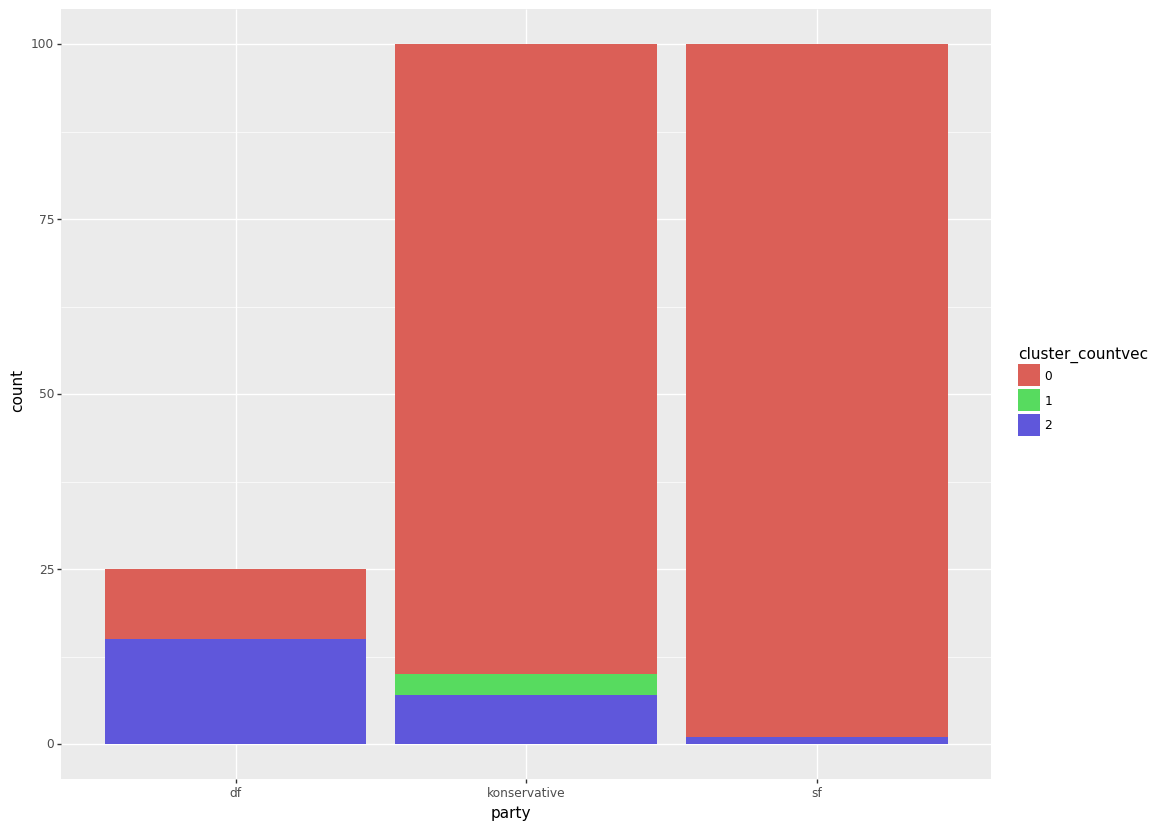

<ggplot: (8774075731536)>

In [39]:
from plotnine import ggplot, aes, geom_bar

(ggplot(data = poltext_df, mapping = aes(x = 'party', group = 'cluster_countvec', fill = 'cluster_countvec')) 
 + geom_bar())

## Klyngeanalyse ud fra TfIdf vectorizer (Tf-idf vægtning af ord)

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df = 0.05, max_df = 0.9) # dan vectorizerfunktion
transformed_documents = vectorizer.fit_transform(poltexts) # brug vectorizer på tekster

# Konverter fittet vectorizer til array
transformed_documents_as_array = transformed_documents.toarray()

# Konverter til data frame
tfidf_df = pd.DataFrame(transformed_documents_as_array, columns = vectorizer.get_feature_names_out())

In [43]:
from sklearn.cluster import KMeans
kmeans = KMeans(3)

identified_clusters = kmeans.fit_predict(tfidf_df)
identified_clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1,
       2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2,
       2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1], dtype=int32)

In [44]:
poltext_df['cluster_countvec'] = identified_clusters
poltext_df['cluster_countvec'] = poltext_df['cluster_countvec'].astype('str') # omdannes til string for at gøre den kategorisk

In [45]:
poltext_df.groupby(['party', 'cluster_countvec']).size() / poltext_df.groupby(['party']).size()

party         cluster_countvec
df            1                   1.00
konservative  0                   0.01
              1                   0.28
              2                   0.71
sf            0                   0.98
              1                   0.02
dtype: float64

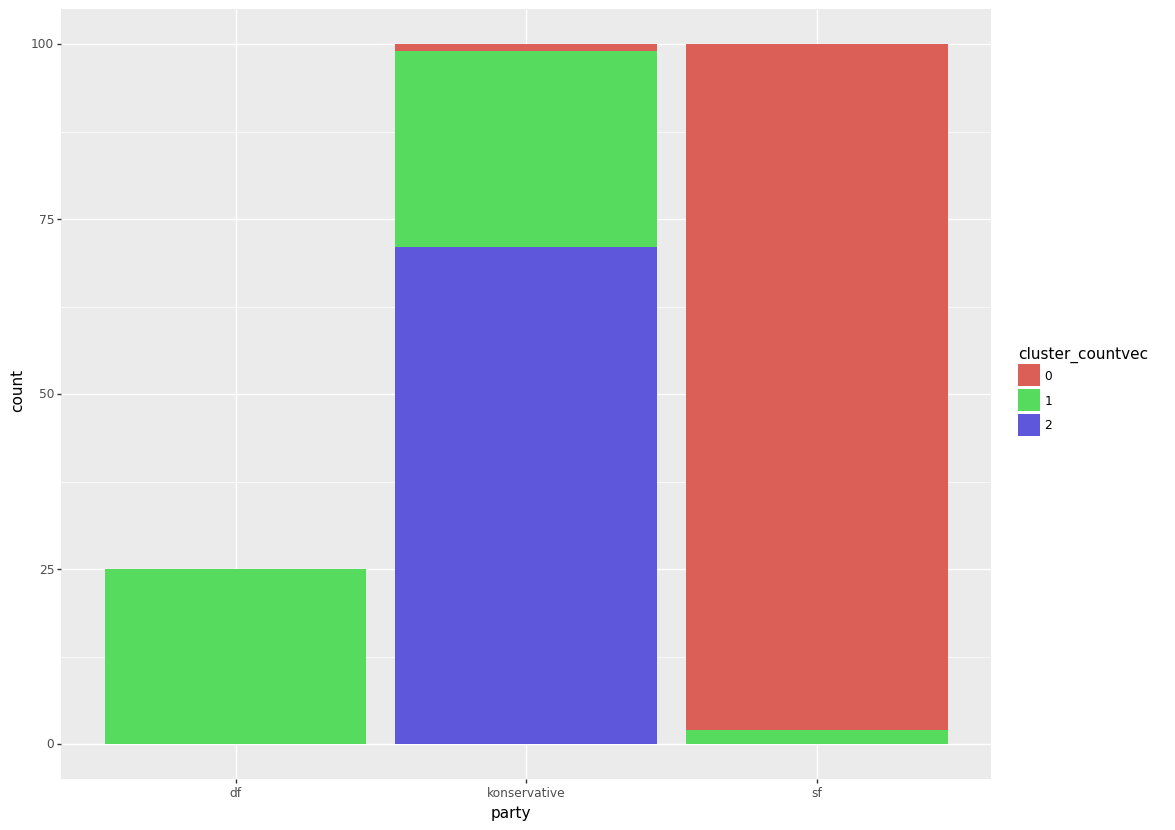

<ggplot: (8774075640418)>

In [46]:
import plotnine
plotnine.options.figure_size = (12, 10)
from plotnine import ggplot, aes, geom_bar

(ggplot(data = poltext_df, mapping = aes(x = 'party', group = 'cluster_countvec', fill = 'cluster_countvec')) 
 + geom_bar())

## Klyngeanalyse ud fra egen tokenizer og TfIdf vectorizer

In [47]:
# dan tokenizer

def tokenizer(text):
    
    custom_stops = ["del"] # Definerer kontekstspecifikke stopord
    default_stopwords = list(nlp.Defaults.stop_words) # Indlæser prædefineret stopordsliste
    stop_words = default_stopwords + custom_stops # Danner samlet stopordsliste
    
    pos_tags = ['PROPN', 'ADJ', 'NOUN'] # Definerer POS-tags som skal bevares: egenavne, adjektiver og navneord

    doc = nlp(text)

    tokens = []

    for word in doc: # Looper igennem hvert ord i tweet
        if (len(word.lemma_) < 3): # Ord må ikke være mindre end 3 karakterer - går videre til næste ord, hvis det er
            continue
        if (word.pos_ in pos_tags) and (word.lemma_ not in stop_words): # Tjek at ordets POS-tag indgår i listen af accepterede tags og at ordet ikke er stopord
            tokens.append(word.lemma_) # Tilføj ordets lemma til tokens, hvis if-betingelse er opfyldt
                
    return(tokens)

In [48]:
# vectorizer

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df = 0.05, max_df = 0.9, tokenizer = tokenizer) # dan vectorizerfunktion
transformed_documents = vectorizer.fit_transform(poltexts) # brug vectorizer på tekster

# Konverter fittet vectorizer til array
transformed_documents_as_array = transformed_documents.toarray()

# Konverter til data frame
tfidf_tk_df = pd.DataFrame(transformed_documents_as_array, columns = vectorizer.get_feature_names_out())

In [49]:
from sklearn.cluster import KMeans
kmeans = KMeans(3)

identified_clusters = kmeans.fit_predict(tfidf_df)
identified_clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2], dtype=int32)

In [50]:
poltext_df['cluster_countvec'] = identified_clusters
poltext_df['cluster_countvec'] = poltext_df['cluster_countvec'].astype('str') # omdannes til string for at gøre den kategorisk

In [51]:
poltext_df.groupby(['party', 'cluster_countvec']).size() / poltext_df.groupby(['party']).size()

party         cluster_countvec
df            1                   0.04
              2                   0.96
konservative  0                   0.83
              2                   0.17
sf            0                   0.01
              1                   0.99
dtype: float64

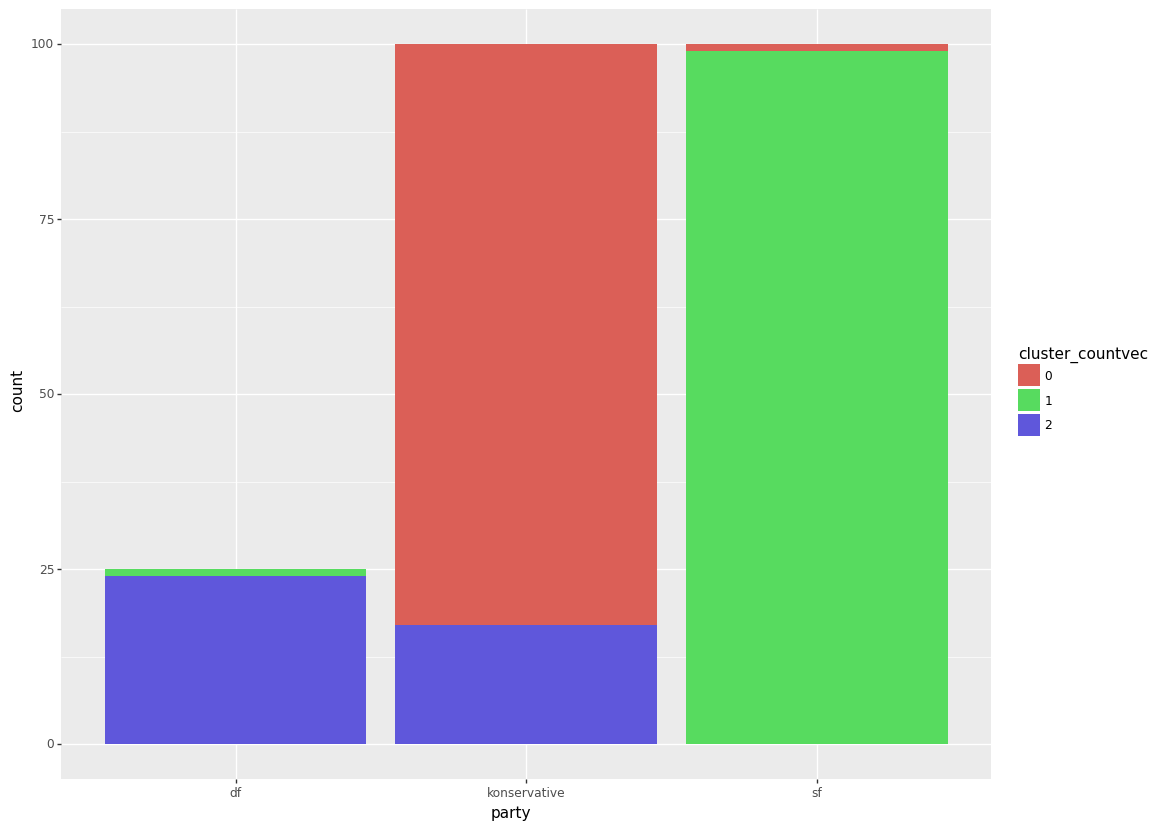

<ggplot: (8774075413916)>

In [52]:
import plotnine
plotnine.options.figure_size = (12, 10)
from plotnine import ggplot, aes, geom_bar

(ggplot(data = poltext_df, mapping = aes(x = 'party', group = 'cluster_countvec', fill = 'cluster_countvec')) 
 + geom_bar())

## PCA på tekst

In [61]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=142)

pca_vecs = pca.fit_transform(tfidf_tk_df)

pca1 = pca_vecs[:, 0]
pca2 = pca_vecs[:, 1]

poltext_df['pca1'] = pca1
poltext_df['pca2'] = pca2

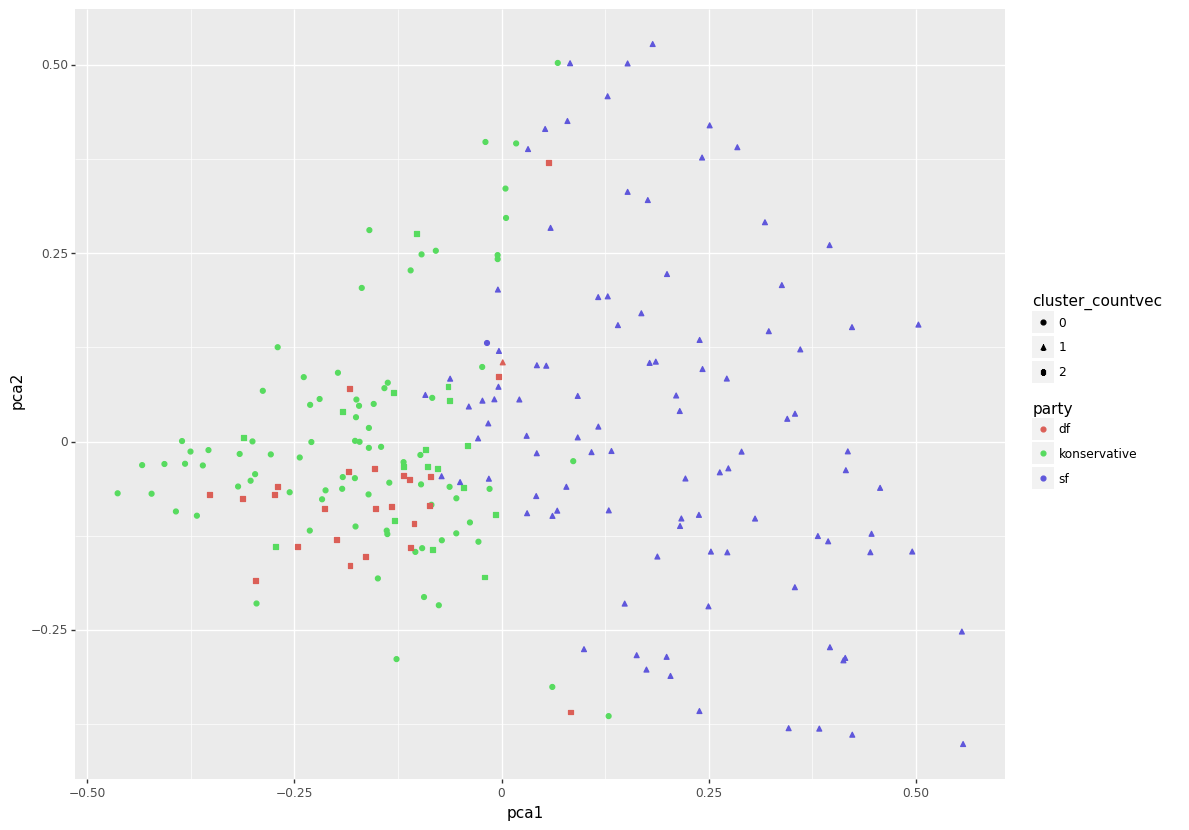

<ggplot: (8774068798705)>

In [67]:
from plotnine import ggplot, aes, geom_point

(ggplot(data = poltext_df, mapping = aes(x = 'pca1', y = 'pca2', shape = 'cluster_countvec', colour = 'party')) 
 + geom_point())